In [828]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import calendar
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [513]:
discount=pd.read_csv("Discount_Coupon.csv")
Marketing_Spend=pd.read_csv("Marketing_Spend.csv")
Online_Sales=pd.read_csv("Online_Sales.csv")
Tax_amount=pd.read_excel("Tax_amount.xlsx")
CustomersData=pd.read_excel("CustomersData.xlsx")

In [514]:
discount.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [515]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [516]:
Marketing_Spend.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [517]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [518]:
Online_Sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [519]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [520]:
Tax_amount.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


In [521]:
Tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [522]:
CustomersData.head(2)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43


In [523]:
CustomersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [524]:
### Mergin the tables of CustomersData, Online_Sales 
data=pd.merge(CustomersData, Online_Sales, on="CustomerID")
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,M,Chicago,12,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,M,Chicago,12,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,M,Chicago,12,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [525]:
### Transaction_Date	 need to convert to datetime type
data["Transaction_Date"]=pd.to_datetime(data["Transaction_Date"],format='%Y%m%d')

In [526]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [527]:
### Need to merge the tax table by the key Product_Category
data=pd.merge(data,Tax_amount,on="Product_Category")

In [528]:
## coverting the Tenure Months to date time to merge the table of discount
data["Tenure_Months"]=pd.to_datetime(data.Transaction_Date,infer_datetime_format=True).dt.strftime("%b")

In [529]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1


In [530]:
data["Month"]=pd.to_datetime(data.Transaction_Date,infer_datetime_format=True).dt.strftime("%b")

In [531]:
#data['Month'] = pd.to_datetime(data['Month'], format='%b', errors='coerce')

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  object        
 4   Transaction_ID       52924 non-null  int64         
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_SKU          52924 non-null  object        
 7   Product_Description  52924 non-null  object        
 8   Product_Category     52924 non-null  object        
 9   Quantity             52924 non-null  int64         
 10  Avg_Price            52924 non-null  float64       
 11  Delivery_Charges     52924 non-null  float64       
 12  Coupon_Status        52924 non-null  object        
 13  GST                  52924 non-

In [533]:
data=pd.merge(data,discount,on=["Month","Product_Category"])

In [534]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10


#### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges
#### Invoice Value: Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges,


In [535]:
data["invoice_value"]=((data["Quantity"]*data["Avg_Price"])*(1-data["Discount_pct"]/100)*(1+data["GST"]))+data["Delivery_Charges"]


In [536]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729


In [537]:
data["revenue"]=(data["Quantity"]*data["Avg_Price"])*(1-data["Discount_pct"]/100)

In [538]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,Jan,ELEC10,10,249.5846,220.986
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,Jan,ELEC10,10,87.1850,73.350
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,Jan,ELEC10,10,158.6729,138.339


#### 2. Perform Detailed exploratory analysis


##### Understanding how many customers acquired every month

In [539]:
data.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Discount_pct,invoice_value,revenue
count,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000
mean,15345.347213,32445.093367,4.500171,52.429089,10.476922,0.137433,19.953164,89.055712,70.780353
std,1766.862675,8654.724704,20.159985,64.156649,19.343153,0.045865,8.127280,152.437619,136.477625
min,12346.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,10.000000,4.375440,0.287000
25%,13869.000000,25404.000000,1.000000,5.700000,6.000000,0.100000,10.000000,18.545760,9.513000
50%,15311.000000,32678.000000,1.000000,16.990000,6.000000,0.180000,20.000000,40.683740,24.500000
75%,16996.000000,39174.250000,2.000000,119.000000,6.500000,0.180000,30.000000,123.447600,104.300000
max,18283.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,30.000000,8979.275000,8545.500000


In [540]:
customer_month_pairs = data[['CustomerID', 'Month']].drop_duplicates()

In [541]:
customer_month_pairs

,CustomerID,Month
0,17850,Jan
128,13047,Jan
132,12583,Jan
133,15100,Jan
134,14688,Jan
...,...,...
50986,14341,Nov
51638,16210,Oct
51662,12947,Oct
51843,17389,Oct


In [542]:
customers_acquired_per_month = customer_month_pairs.groupby('Month').size().reset_index(name='CustomersAcquired')

In [543]:
customers_acquired_per_month

,Month,CustomersAcquired
0,Apr,224
1,Aug,300
2,Dec,236
3,Feb,109
4,Jan,215
5,Jul,235
6,Jun,259
7,Mar,208
8,May,200
9,Nov,188


In [544]:
customer_month_pairs_1 = customer_month_pairs.sort_values(by=['CustomerID', 'Month'])

In [545]:
customer_month_pairs_1

,CustomerID,Month
16085,12346,Sep
5036,12347,Mar
7553,12347,Nov
6199,12348,Jun
13312,12348,Oct
...,...,...
17919,18269,Apr
26237,18269,Jun
13849,18277,Oct
12868,18283,Jul


#### 2.Understand the retention of customers on month on month basis

In [546]:
customer_month_pairs_1['PrevMonth'] = customer_month_pairs_1.groupby('CustomerID')['Month'].shift()

In [547]:
customer_month_pairs_1

,CustomerID,Month,PrevMonth
16085,12346,Sep,NaN
5036,12347,Mar,NaN
7553,12347,Nov,Mar
6199,12348,Jun,NaN
13312,12348,Oct,Jun
...,...,...,...
17919,18269,Apr,NaN
26237,18269,Jun,Apr
13849,18277,Oct,NaN
12868,18283,Jul,NaN


In [548]:
customer_month_pairs_1['Retained'] = customer_month_pairs_1['PrevMonth'] == customer_month_pairs_1['Month']

In [549]:
customer_month_pairs_1

,CustomerID,Month,PrevMonth,Retained
16085,12346,Sep,NaN,False
5036,12347,Mar,NaN,False
7553,12347,Nov,Mar,False
6199,12348,Jun,NaN,False
13312,12348,Oct,Jun,False
...,...,...,...,...
17919,18269,Apr,NaN,False
26237,18269,Jun,Apr,False
13849,18277,Oct,NaN,False
12868,18283,Jul,NaN,False


In [550]:
retention_per_month = customer_month_pairs_1.groupby('Month')['Retained'].mean().reset_index(name='RetentionRate')

In [551]:
retention_per_month

,Month,RetentionRate
0,Apr,0.0
1,Aug,0.0
2,Dec,0.0
3,Feb,0.0
4,Jan,0.0
5,Jul,0.0
6,Jun,0.0
7,Mar,0.0
8,May,0.0
9,Nov,0.0


#### there are only new customers in entire datset. therefore, we can say that retention rate of customers is zero percent in all months

In [552]:
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,Jan,ELEC10,10,249.5846,220.986
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,Jan,ELEC10,10,87.1850,73.350
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,Jan,ELEC10,10,158.6729,138.339


In [553]:
monthly_revenue = data.groupby(['Month', 'CustomerID'])['revenue'].sum().reset_index()

In [554]:
monthly_revenue

,Month,CustomerID,revenue
0,Apr,12429,2015.766
1,Apr,12433,4515.219
2,Apr,12471,5092.704
3,Apr,12481,751.428
4,Apr,12494,120.186
...,...,...,...
2572,Sep,18179,914.466
2573,Sep,18190,6.965
2574,Sep,18212,1892.282
2575,Sep,18223,2018.408


In [555]:
first_purchase_month = data.groupby('CustomerID')['Month'].min().reset_index()
new_customers = first_purchase_month
new_customers['NewCustomer'] = True

In [556]:
first_purchase_month

,CustomerID,Month,NewCustomer
0,12346,Sep,True
1,12347,Mar,True
2,12348,Jun,True
3,12350,Dec,True
4,12356,Sep,True
...,...,...,...
1463,18259,Apr,True
1464,18260,Aug,True
1465,18269,Apr,True
1466,18277,Oct,True


In [557]:
new_customers

,CustomerID,Month,NewCustomer
0,12346,Sep,True
1,12347,Mar,True
2,12348,Jun,True
3,12350,Dec,True
4,12356,Sep,True
...,...,...,...
1463,18259,Apr,True
1464,18260,Aug,True
1465,18269,Apr,True
1466,18277,Oct,True


In [558]:
# Merge monthly revenue data with information about new customers
monthly_revenue = pd.merge(monthly_revenue, new_customers, on=["Month",'CustomerID'])

In [559]:
monthly_revenue

,Month,CustomerID,revenue,NewCustomer
0,Apr,12429,2015.766,True
1,Apr,12433,4515.219,True
2,Apr,12471,5092.704,True
3,Apr,12481,751.428,True
4,Apr,12494,120.186,True
...,...,...,...,...
1463,Sep,17862,718.284,True
1464,Sep,17988,1266.300,True
1465,Sep,18069,3510.612,True
1466,Sep,18212,1892.282,True


In [560]:
monthly_revenue['NewCustomer'] = monthly_revenue['NewCustomer'].fillna(False)

In [561]:
monthly_revenue

,Month,CustomerID,revenue,NewCustomer
0,Apr,12429,2015.766,True
1,Apr,12433,4515.219,True
2,Apr,12471,5092.704,True
3,Apr,12481,751.428,True
4,Apr,12494,120.186,True
...,...,...,...,...
1463,Sep,17862,718.284,True
1464,Sep,17988,1266.300,True
1465,Sep,18069,3510.612,True
1466,Sep,18212,1892.282,True


In [577]:
existing_customers_revenue = monthly_revenue[monthly_revenue['NewCustomer'] == False].groupby('Month')['revenue'].sum().reset_index()
new_customers_revenue = monthly_revenue[monthly_revenue['NewCustomer'] == True].groupby('Month')['revenue'].sum().reset_index()

In [578]:
existing_customers_revenue

,Month,revenue


In [579]:
new_customers_revenue

,Month,revenue
0,Apr,357159.753
1,Aug,269969.232
2,Dec,263668.139
3,Feb,160717.632
4,Jan,243861.012
5,Jul,113703.165
6,Jun,101855.957
7,Mar,130431.287
8,May,105300.120
9,Nov,169874.776


#### since all are new  customer we cant bifergate old and new customer in the data set, so new customer avegare monthly revenue revenue calculated

In [581]:
custom_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
new_customers_revenue['Month_Order'] = new_customers_revenue['Month'].map(custom_order)
new_customers_revenue = new_customers_revenue.sort_values('Month_Order').drop('Month_Order', axis=1).reset_index(drop=True)

In [582]:
new_customers_revenue

,Month,revenue
0,Jan,243861.012
1,Feb,160717.632
2,Mar,130431.287
3,Apr,357159.753
4,May,105300.120
5,Jun,101855.957
6,Jul,113703.165
7,Aug,269969.232
8,Sep,84385.245
9,Oct,175130.928


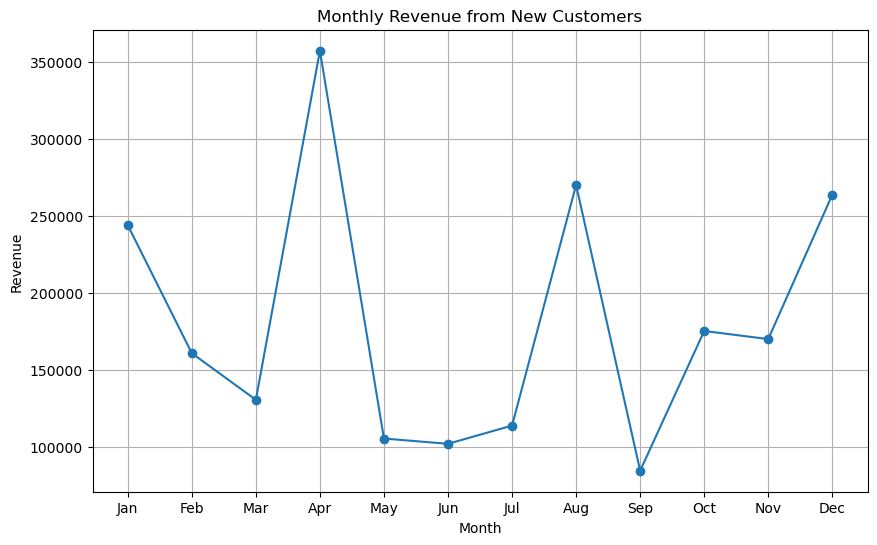

In [583]:
plt.figure(figsize=(10, 6))
plt.plot(new_customers_revenue['Month'], new_customers_revenue['revenue'], marker='o')
plt.title('Monthly Revenue from New Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### 4.How the discounts playing role in the revenues?

In [585]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,ELEC10,10,158.6729,138.339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,Jan,ELEC10,10,158.6729,138.339
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.10,Jan,ELEC10,10,249.5846,220.986
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.10,Jan,ELEC10,10,87.1850,73.350
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.10,Jan,ELEC10,10,158.6729,138.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,15719,F,Chicago,Jul,33945,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,25.00,0.0,Not Used,0.05,Jul,GC10,10,47.2500,45.000
52520,17634,F,Chicago,Jul,33970,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500
52521,17634,F,Chicago,Jul,33971,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500
52522,17634,F,Chicago,Jul,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500


In [586]:
data=pd.merge(data,discount, on=["Month","Product_Category"])

In [587]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code_x,Discount_pct_x,invoice_value,revenue,Coupon_Code_y,Discount_pct_y
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.10,Jan,ELEC10,10,158.6729,138.339,ELEC10,10
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.10,Jan,ELEC10,10,158.6729,138.339,ELEC10,10
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,0.10,Jan,ELEC10,10,249.5846,220.986,ELEC10,10
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.5,Clicked,0.10,Jan,ELEC10,10,87.1850,73.350,ELEC10,10
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Clicked,0.10,Jan,ELEC10,10,158.6729,138.339,ELEC10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,15719,F,Chicago,Jul,33945,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,...,0.0,Not Used,0.05,Jul,GC10,10,47.2500,45.000,GC10,10
52520,17634,F,Chicago,Jul,33970,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500,GC10,10
52521,17634,F,Chicago,Jul,33971,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500,GC10,10
52522,17634,F,Chicago,Jul,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.0,Clicked,0.05,Jul,GC10,10,23.6250,22.500,GC10,10


In [588]:
data.groupby(["Coupon_Status"])[["revenue"]].sum()

,revenue
Coupon_Status,
Clicked,1895571.742
Not Used,580463.783
Used,1241631.722


In [592]:
coupon_used=data[data.Coupon_Status=="Used"].groupby(["Month"])[["revenue"]].sum().reindex(desired_order)

In [593]:
coupon_used

,revenue
Month,
Jan,116746.380
Feb,77693.336
Mar,79255.316
Apr,120963.627
May,75557.224
Jun,75061.385
Jul,108110.556
Aug,112440.664
Sep,93305.450


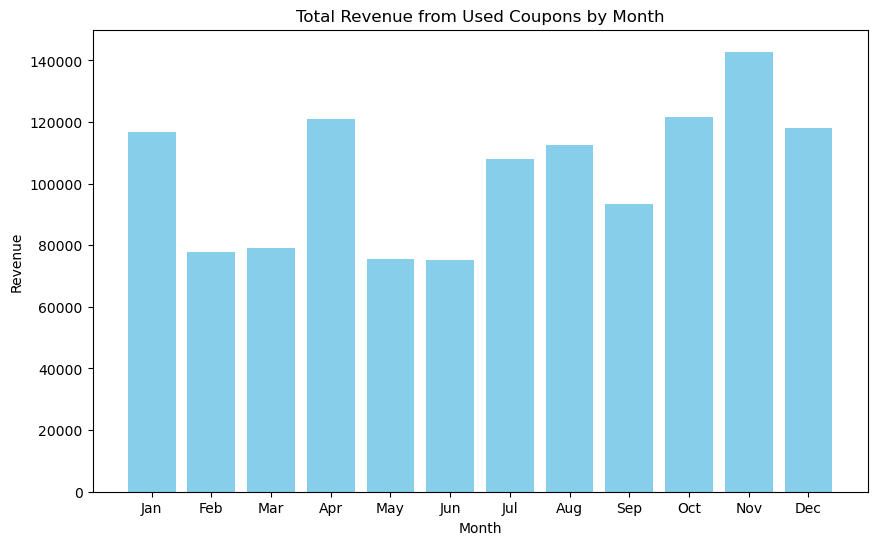

In [598]:
plt.figure(figsize=(10, 6))
plt.bar(coupon_used.index, coupon_used['revenue'], color='skyblue')
plt.title('Total Revenue from Used Coupons by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [597]:
Not_Used=data[data.Coupon_Status=="Not Used"].groupby(["Month"])[["revenue"]].sum().reindex(desired_order)
Not_Used

,revenue
Month,
Jan,53367.597
Feb,39894.392
Mar,40321.148
Apr,52564.041
May,36981.960
Jun,39748.408
Jul,54127.143
Aug,49749.160
Sep,38367.749


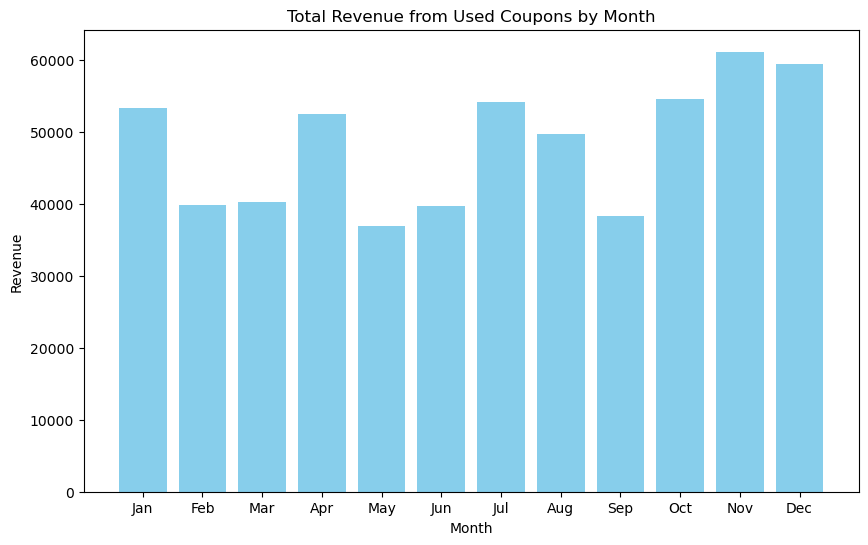

In [599]:
plt.figure(figsize=(10, 6))
plt.bar(Not_Used.index, Not_Used['revenue'], color='skyblue')
plt.title('Total Revenue from Used Coupons by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

#### Analyse KPI’s like Revenue, number of orders, average order value, number of  customers (existing/new), quantity, by category, by month, by week, by day etc…

In [600]:
data.head(3)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code_x,Discount_pct_x,invoice_value,revenue,Coupon_Code_y,Discount_pct_y
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339,ELEC10,10
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339,ELEC10,10
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,0.1,Jan,ELEC10,10,249.5846,220.986,ELEC10,10


In [602]:
data=data.drop(columns=["Coupon_Code_y","Discount_pct_y"])

In [608]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339


In [605]:
data=data.rename(columns={"Coupon_Code_x":"Coupon_Code","Discount_pct_x":"Discount_pct"})

In [607]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan,ELEC10,10,158.6729,138.339


In [609]:
# Extract relevant time-related features
data['Month'] = data['Transaction_Date'].dt.month
data['Week'] = data['Transaction_Date'].dt.week
data['Day'] = data['Transaction_Date'].dt.day

C:\Users\DELL\AppData\Local\Temp\ipykernel_17876\3660923855.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Transaction_Date'].dt.week


####  KPIs by Month

In [611]:
monthly_kpis = data.groupby('Month').agg({
    'revenue': 'sum',
    'Transaction_ID': 'nunique',  # Number of orders
    'Quantity': 'sum',
    'CustomerID': 'nunique',  # Number of customers
}).reset_index()

In [612]:
monthly_kpis

,Month,revenue,Transaction_ID,Quantity,CustomerID
0,1,360949.347,2096,19987,215
1,2,246658.920,1658,16410,109
2,3,241980.711,1982,20543,208
3,4,357159.753,1806,24922,224
4,5,243165.424,2019,18519,200
5,6,223357.225,1934,21482,259
6,7,332562.231,2079,22613,235
7,8,319556.824,2411,27379,300
8,9,251858.068,1929,19329,193
9,10,367271.883,2123,17400,210


##### Note: CustomerID refers to number of customer 

#### weekly_kpis

In [614]:
weekly_kpis = data.groupby('Week').agg({
    'revenue':'sum',
    'Transaction_ID':'nunique',
    'Quantity':'sum',
    'CustomerID':'nunique',
}).reset_index()

In [615]:
weekly_kpis

,Week,revenue,Transaction_ID,Quantity,CustomerID
0,1,96019.069,571,5937,53
1,2,75211.083,428,4638,43
2,3,80099.568,465,4311,48
3,4,77981.292,460,3041,45
4,5,73163.144,461,4226,64
5,6,60795.464,401,3645,37
6,7,67732.168,452,5224,30
7,8,59999.448,404,3591,21
8,9,54627.111,406,3618,25
9,10,50813.595,474,4469,50


#### KPIs by Day

In [617]:

daily_kpis = data.groupby('Day').agg({
    'revenue': 'sum',
    'Transaction_ID': 'nunique',
    'Quantity': 'sum',
    'CustomerID': 'nunique',
}).reset_index()

In [618]:
daily_kpis

,Day,revenue,Transaction_ID,Quantity,CustomerID
0,1,114051.809,778,7158,100
1,2,115742.188,755,7552,92
2,3,112223.684,832,6512,89
3,4,108946.437,828,6911,108
4,5,150935.107,844,13092,107
5,6,124446.453,846,8115,98
6,7,122423.039,804,8147,97
7,8,105624.239,780,7943,87
8,9,112547.160,772,7302,80
9,10,119188.125,774,7764,85


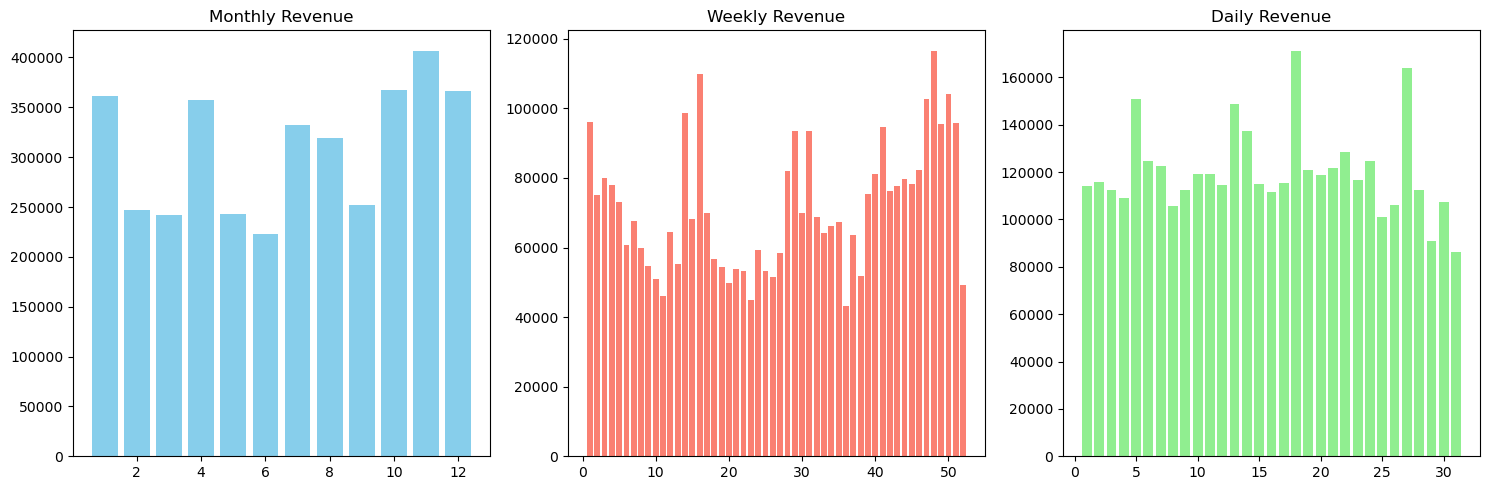

In [620]:
plt.figure(figsize=(15, 5))

# Plot by Month
plt.subplot(1, 3, 1)
plt.bar(monthly_kpis['Month'], monthly_kpis['revenue'], color='skyblue')
plt.title('Monthly Revenue')

# Plot by Week
plt.subplot(1, 3, 2)
plt.bar(weekly_kpis['Week'], weekly_kpis['revenue'], color='salmon')
plt.title('Weekly Revenue')

# Plot by Day
plt.subplot(1, 3, 3)
plt.bar(daily_kpis['Day'], daily_kpis['revenue'], color='lightgreen')
plt.title('Daily Revenue')

plt.tight_layout()
plt.show()

#### Understand the trends/seasonality of sales by category, location, month etc…

In [622]:
data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue,Week,Day
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,1,ELEC10,10,158.6729,138.339,1,1
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,1,ELEC10,10,158.6729,138.339,1,1


##### KPIs by Category and Month

In [626]:
category_monthly_sales=data.groupby(["Product_Category","Month"]).agg({"revenue":"sum",'Quantity':"sum"}).reset_index()

In [629]:
category_monthly_sales

,Product_Category,Month,revenue,Quantity
0,Accessories,1,46.413,1
1,Accessories,3,41.993,1
2,Accessories,4,150.264,4
3,Accessories,5,112.912,6
4,Accessories,6,145.411,7
...,...,...,...,...
168,Waze,8,449.056,88
169,Waze,9,206.857,49
170,Waze,10,423.990,90
171,Waze,11,831.072,136


In [630]:
location_monthly_sales=data.groupby(["Location","Month"]).agg({"revenue":"sum",'Quantity':"sum"}).reset_index()

In [631]:
location_monthly_sales

,Location,Month,revenue,Quantity
0,California,1,133636.293,8782
1,California,2,71520.096,3635
2,California,3,68927.005,5372
3,California,4,107870.373,7251
4,California,5,68407.136,6086
5,California,6,69654.900,4482
6,California,7,106714.269,7609
7,California,8,94590.584,7427
8,California,9,81383.953,5765
9,California,10,103431.753,6355


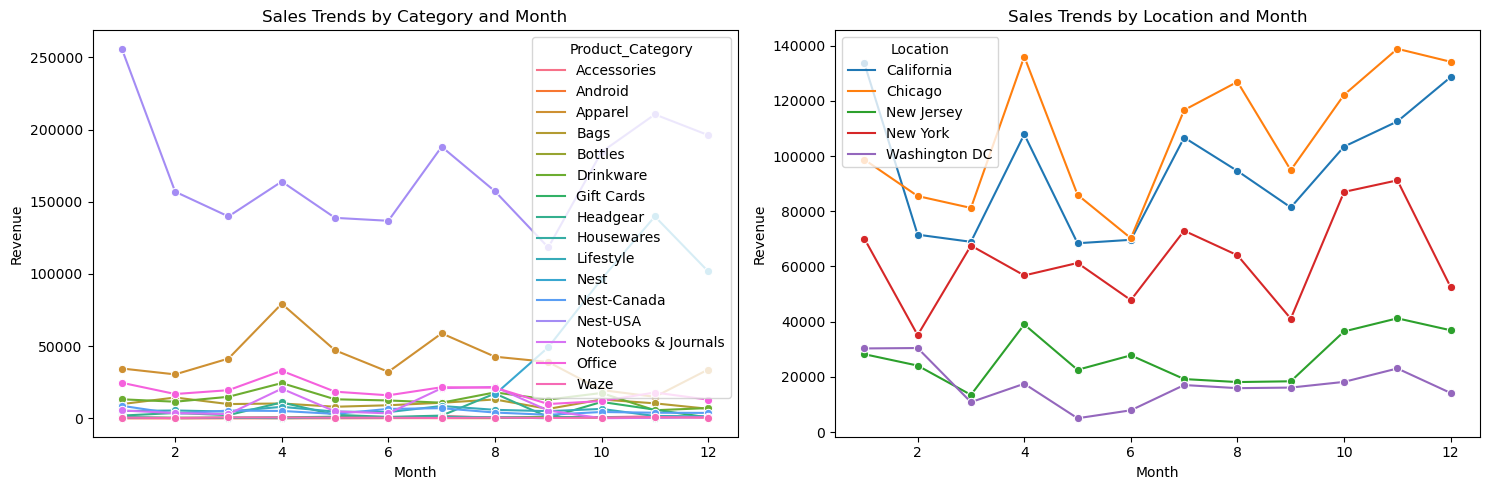

In [632]:
# Plotting trends by Category and Month
plt.figure(figsize=(15, 5))

# Plot by Category
plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='revenue', hue='Product_Category', data=category_monthly_sales, marker='o')
plt.title('Sales Trends by Category and Month')
plt.xlabel('Month')
plt.ylabel('Revenue')

# Plot by Location
plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='revenue', hue='Location', data=location_monthly_sales, marker='o')
plt.title('Sales Trends by Location and Month')
plt.xlabel('Month')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

#### How number order varies and sales with different days

In [634]:
data['Day'] = data['Transaction_Date'].dt.day_name()


In [639]:
days_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [644]:
daily_kpis_1 = data.groupby('Day').agg({
    'Transaction_ID': 'nunique',  # Number of orders
    'revenue': 'sum',
}).reset_index()

In [645]:
daily_kpis_1

,Day,Transaction_ID,revenue
0,Friday,4225,690544.524
1,Monday,2126,289230.543
2,Saturday,3864,536950.172
3,Sunday,3842,548569.263
4,Thursday,4265,675089.299
5,Tuesday,2313,317220.780
6,Wednesday,4365,660062.666


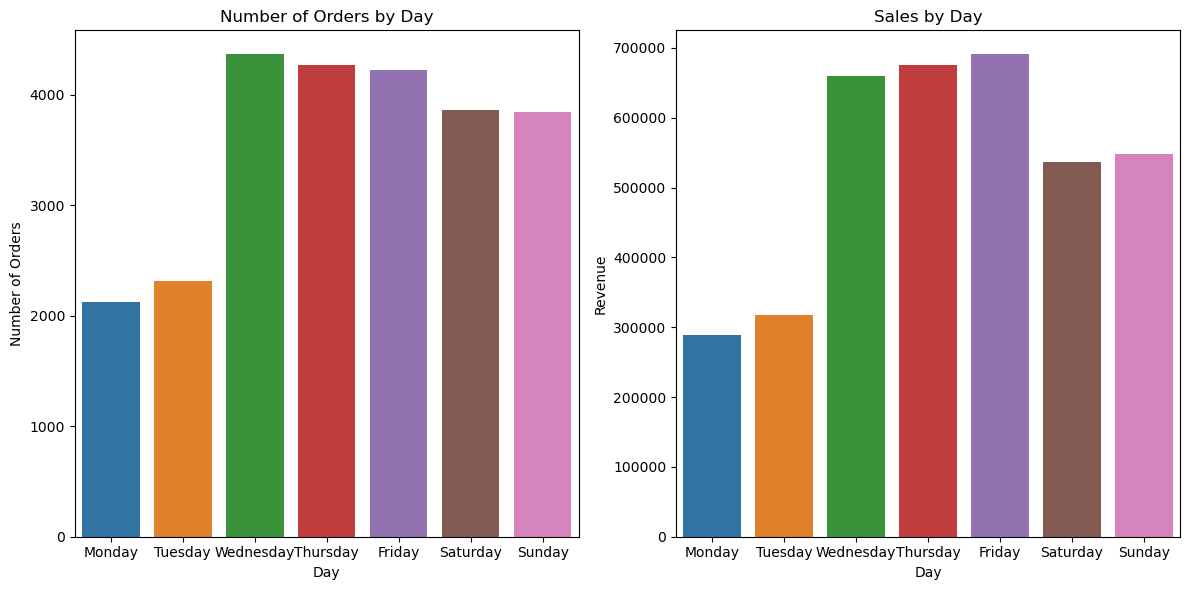

In [646]:
# Plot Number of Orders by Day

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Day',y='Transaction_ID',data=daily_kpis_1, order=days_order)
plt.title('Number of Orders by Day')
plt.xlabel('Day')
plt.ylabel('Number of Orders')

# Plot Sales by Day
plt.subplot(1, 2, 2)
sns.barplot(x='Day', y='revenue', data=daily_kpis_1, order=days_order)
plt.title('Sales by Day')
plt.xlabel('Day')
plt.ylabel('Revenue')


plt.tight_layout()
plt.show()

#### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

In [647]:
data.head(3)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue,Week,Day
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,1,ELEC10,10,158.6729,138.339,1,Tuesday
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,0.1,1,ELEC10,10,158.6729,138.339,1,Tuesday
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,6.5,Not Used,0.1,1,ELEC10,10,249.5846,220.986,1,Tuesday


In [648]:
data["discount_val"] = ((data["Quantity"] * data["Avg_Price"]) * ( data["Discount_pct"] / 100))

In [650]:
data["gst_amount"] = (data["invoice_value"]-data["Delivery_Charges"]) - (data["Quantity"]*data["Avg_Price"])*(1-data["Discount_pct"]/100)

In [692]:
summary=data.groupby(["Transaction_Date"])[["invoice_value","discount_val","gst_amount","revenue"]].agg(np.sum)

In [693]:
summary

,invoice_value,discount_val,gst_amount,revenue
Transaction_Date,,,,
2019-01-01,8439.47708,734.341,754.67808,6609.069
2019-01-02,14054.81838,1330.152,1248.91038,11971.368
2019-01-03,27306.41859,2379.959,2271.84759,21419.631
2019-01-04,17906.88365,1641.201,1688.43465,14770.809
2019-01-05,19784.49618,1732.125,1826.54118,15589.125
...,...,...,...,...
2019-12-27,11212.75407,4098.477,878.24107,9563.113
2019-12-28,9012.62022,3298.326,635.94622,7696.094
2019-12-29,9818.46779,3603.381,807.70879,8407.889


In [694]:
summary=summary.reset_index()

In [695]:
summary

,Transaction_Date,invoice_value,discount_val,gst_amount,revenue
0,2019-01-01,8439.47708,734.341,754.67808,6609.069
1,2019-01-02,14054.81838,1330.152,1248.91038,11971.368
2,2019-01-03,27306.41859,2379.959,2271.84759,21419.631
3,2019-01-04,17906.88365,1641.201,1688.43465,14770.809
4,2019-01-05,19784.49618,1732.125,1826.54118,15589.125
...,...,...,...,...,...
360,2019-12-27,11212.75407,4098.477,878.24107,9563.113
361,2019-12-28,9012.62022,3298.326,635.94622,7696.094
362,2019-12-29,9818.46779,3603.381,807.70879,8407.889
363,2019-12-30,6542.21505,2420.541,483.10605,5647.929


In [685]:
summary.head(5)

,Transaction_Date,invoice_value,discount_val,gst_amount,revenue
0,2019-01-01,8439.47708,734.341,754.67808,6609.069
1,2019-01-02,14054.81838,1330.152,1248.91038,11971.368
2,2019-01-03,27306.41859,2379.959,2271.84759,21419.631
3,2019-01-04,17906.88365,1641.201,1688.43465,14770.809
4,2019-01-05,19784.49618,1732.125,1826.54118,15589.125


In [697]:
Marketing_Spend

,Transaction_Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [ ]:
Marketing_Spend.Date=pd.to_datetime(Marketing_Spend.Date,infer_datetime_format=True)

In [698]:
Marketing_Spend=Marketing_Spend.rename(columns={"Date":"Transaction_Date"})

In [699]:
Marketing_Spend

,Transaction_Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [700]:
summary=pd.merge(summary,Marketing_Spend,on="Transaction_Date")

In [701]:
summary

,Transaction_Date,invoice_value,discount_val,gst_amount,revenue,Offline_Spend,Online_Spend
0,2019-01-01,8439.47708,734.341,754.67808,6609.069,4500,2424.50
1,2019-01-02,14054.81838,1330.152,1248.91038,11971.368,4500,3480.36
2,2019-01-03,27306.41859,2379.959,2271.84759,21419.631,4500,1576.38
3,2019-01-04,17906.88365,1641.201,1688.43465,14770.809,4500,2928.55
4,2019-01-05,19784.49618,1732.125,1826.54118,15589.125,4500,4055.30
...,...,...,...,...,...,...,...
360,2019-12-27,11212.75407,4098.477,878.24107,9563.113,4000,3396.87
361,2019-12-28,9012.62022,3298.326,635.94622,7696.094,4000,3246.84
362,2019-12-29,9818.46779,3603.381,807.70879,8407.889,4000,2546.58
363,2019-12-30,6542.21505,2420.541,483.10605,5647.929,4000,674.31


In [702]:
summary["month"]=summary.Transaction_Date.dt.month

In [703]:
summary

,Transaction_Date,invoice_value,discount_val,gst_amount,revenue,Offline_Spend,Online_Spend,month
0,2019-01-01,8439.47708,734.341,754.67808,6609.069,4500,2424.50,1
1,2019-01-02,14054.81838,1330.152,1248.91038,11971.368,4500,3480.36,1
2,2019-01-03,27306.41859,2379.959,2271.84759,21419.631,4500,1576.38,1
3,2019-01-04,17906.88365,1641.201,1688.43465,14770.809,4500,2928.55,1
4,2019-01-05,19784.49618,1732.125,1826.54118,15589.125,4500,4055.30,1
...,...,...,...,...,...,...,...,...
360,2019-12-27,11212.75407,4098.477,878.24107,9563.113,4000,3396.87,12
361,2019-12-28,9012.62022,3298.326,635.94622,7696.094,4000,3246.84,12
362,2019-12-29,9818.46779,3603.381,807.70879,8407.889,4000,2546.58,12
363,2019-12-30,6542.21505,2420.541,483.10605,5647.929,4000,674.31,12


In [704]:
monthly_summary=summary.groupby(["month"])[["invoice_value",'discount_val','gst_amount','revenue','Offline_Spend','Online_Spend']].agg(np.sum)

In [710]:
monthly_summary

,month,invoice_value,discount_val,gst_amount,revenue,Offline_Spend,Online_Spend
0,1,460087.03245,40105.483,40735.93545,360949.347,96600,58328.95
1,2,324330.66720,61664.730,29217.46720,246658.920,81300,55807.92
2,3,330923.97143,103706.019,29618.97043,241980.711,73500,48750.09
3,4,441974.38503,39684.417,43884.85203,357159.753,96000,61026.83
4,5,313637.96936,60791.356,29726.55536,243165.424,65500,52759.64
5,6,287125.25071,95724.525,26712.18571,223357.225,80500,53818.14
6,7,419784.20761,36951.359,39197.84661,332562.231,67500,52717.85
7,8,415699.17184,79889.206,35547.34784,319556.824,85500,57404.15
8,9,320048.22198,107939.172,27428.09398,251858.068,83000,52514.54
9,10,448939.11355,40807.987,35840.42055,367271.883,93500,57724.65


In [708]:
monthly_summary=monthly_summary.reset_index()

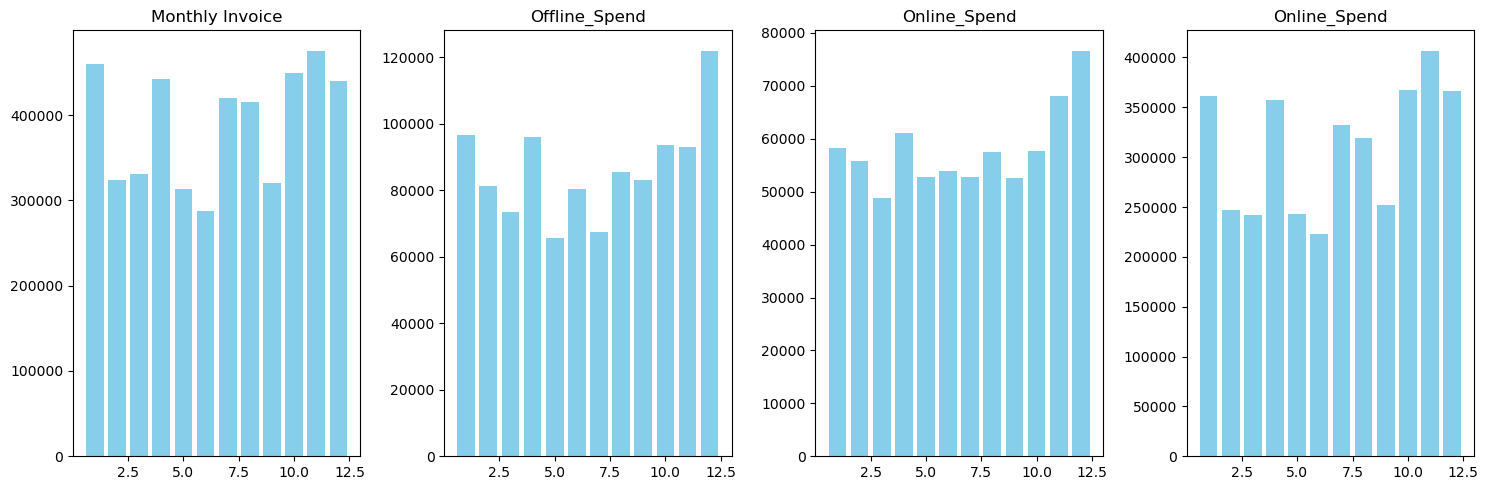

In [713]:
plt.figure(figsize=(15, 5))

# Monthly Invoice
plt.subplot(1, 4, 1)
plt.bar(monthly_summary['month'], monthly_summary['invoice_value'], color='skyblue')
plt.title('Monthly Invoice')

plt.subplot(1, 4, 2)
plt.bar(monthly_summary['month'], monthly_summary['Offline_Spend'], color='skyblue')
plt.title('Offline_Spend')

plt.subplot(1, 4, 3)
plt.bar(monthly_summary['month'], monthly_summary['Online_Spend'], color='skyblue')
plt.title('Online_Spend')

plt.subplot(1, 4, 4)
plt.bar(monthly_summary['month'], monthly_summary['revenue'], color='skyblue')
plt.title('Online_Spend')

plt.tight_layout()
plt.show()

#### How marketing spend is impacting on revenue?

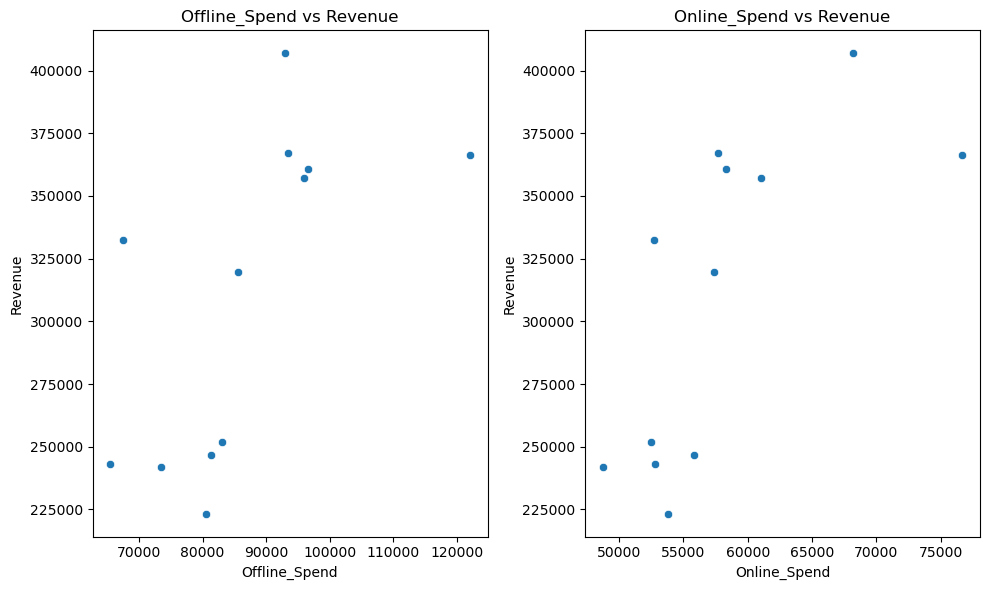

In [715]:

plt.figure(figsize=(10, 6))

# Scatter plot for Offline_Spend vs Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='Offline_Spend', y='revenue', data=monthly_summary)
plt.title('Offline_Spend vs Revenue')
plt.xlabel('Offline_Spend')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Online_Spend', y='revenue', data=monthly_summary)
plt.title('Online_Spend vs Revenue')
plt.xlabel('Online_Spend')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

In [720]:
correlation_offline = monthly_summary['Offline_Spend'].corr(monthly_summary['revenue'])
correlation_online = monthly_summary['Online_Spend'].corr(monthly_summary['revenue'])
print(f"Correlation between Offline_Spend and Revenue: {correlation_offline}")
print(f"Correlation between Online_Spend and Revenue: {correlation_online}")

Correlation between Offline_Spend and Revenue: 0.636670201901585
Correlation between Online_Spend and Revenue: 0.7080462501993509


#### Which product was appeared in the transactions?

In [722]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,GST,Month,Coupon_Code,Discount_pct,invoice_value,revenue,Week,Day,discount_val,gst_amount
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.10,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.10,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,0.10,1,ELEC10,10,249.5846,220.986,1,Tuesday,24.554,22.0986
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,0.10,1,ELEC10,10,87.1850,73.350,1,Tuesday,8.150,7.3350
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,0.10,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,15719,F,Chicago,Jul,33945,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,...,0.05,7,GC10,10,47.2500,45.000,30,Sunday,5.000,2.2500
52520,17634,F,Chicago,Jul,33970,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.05,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250
52521,17634,F,Chicago,Jul,33971,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.05,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250
52522,17634,F,Chicago,Jul,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,0.05,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250


#### Which product was appeared in the transactions

In [725]:
data.Product_SKU.value_counts()

GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
                  ... 
GGOEWALJ083416       1
GGOEYAXB089630       1
GGOEAAWC062448       1
GGOEAAEJ029314       1
GGOEGAUB058312       1
Name: Product_SKU, Length: 1135, dtype: int64

#### Which product was purchased mostly based on the quantity?

In [726]:
data.groupby(["Product_SKU"])[["Quantity"]].sum().sort_values(by="Quantity",ascending=False)

,Quantity
Product_SKU,
GGOEGGOA017399,16234
GGOEGDHC018299,9728
GGOEGBMJ013399,7321
GGOEGOLC014299,6496
GGOEGFKQ020399,5847
...,...
GGOEYAEJ029616,1
GGOEGATB060217,1
GGOEGARJ058416,1


### 3. Performing Customer Segmentation

1.Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
Standard customers and define strategy on the same.

In [778]:
recency_df = data.groupby('CustomerID')['Transaction_Date'].max().reset_index()

In [779]:
recency_df.head()

,CustomerID,Transaction_Date
0,12346,2019-09-15
1,12347,2019-11-02
2,12348,2019-10-19
3,12350,2019-12-14
4,12356,2019-09-15


In [780]:
recency_df['Recency'] = (pd.to_datetime('now') - recency_df['Transaction_Date']).dt.days

C:\Users\DELL\AppData\Local\Temp\ipykernel_17876\945621535.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  recency_df['Recency'] = (pd.to_datetime('now') - recency_df['Transaction_Date']).dt.days


In [781]:
recency_df

,CustomerID,Transaction_Date,Recency
0,12346,2019-09-15,1502
1,12347,2019-11-02,1454
2,12348,2019-10-19,1468
3,12350,2019-12-14,1412
4,12356,2019-09-15,1502
...,...,...,...
1463,18259,2019-04-05,1665
1464,18260,2019-10-05,1482
1465,18269,2019-06-20,1589
1466,18277,2019-10-23,1464


In [783]:
frequency_df = data.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()

In [784]:
frequency_df

,CustomerID,Transaction_ID
0,12346,1
1,12347,31
2,12348,8
3,12350,11
4,12356,13
...,...,...
1463,18259,3
1464,18260,19
1465,18269,2
1466,18277,1


In [785]:
frequency_df.columns = ['CustomerID', 'Frequency']

In [786]:
frequency_df.head(3)

,CustomerID,Frequency
0,12346,1
1,12347,31
2,12348,8


In [787]:
monetary_df = data.groupby('CustomerID')['revenue'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

In [788]:
monetary_df.head(3)

,CustomerID,Monetary
0,12346,21.693
1,12347,9930.649
2,12348,1142.502


In [789]:
# Merge Recency, Frequency, and Monetary values

rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')

In [790]:
rfm_df.head(2)

,CustomerID,Transaction_Date,Recency,Frequency
0,12346,2019-09-15,1502,1
1,12347,2019-11-02,1454,31


In [791]:
rfm_df=pd.merge(rfm_df,monetary_df,on='CustomerID')

In [792]:
rfm_df.head(2)

,CustomerID,Transaction_Date,Recency,Frequency,Monetary
0,12346,2019-09-15,1502,1,21.693
1,12347,2019-11-02,1454,31,9930.649


In [797]:
# Define quartiles for Recency, Frequency, and Monetary
recency_quartiles = pd.qcut(rfm_df['Recency'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Premium', 'Gold', 'Silver', 'Standard'])
frequency_quartiles = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Premium', 'Gold', 'Silver', 'Standard'])
monetary_quartiles = pd.qcut(rfm_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Premium', 'Gold', 'Silver', 'Standard'])


In [798]:
recency_quartiles

0           Gold
1           Gold
2           Gold
3        Premium
4           Gold
          ...   
1463    Standard
1464        Gold
1465      Silver
1466        Gold
1467        Gold
Name: Recency, Length: 1468, dtype: category
Categories (4, object): ['Premium' < 'Gold' < 'Silver' < 'Standard']

In [803]:
# Add RFM segments to the DataFrame
rfm_df['R'] = recency_quartiles
rfm_df['F'] = frequency_quartiles
rfm_df['M'] = monetary_quartiles

In [804]:
# Define overall RFM segment
rfm_df['RFM_Segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)

In [805]:
rfm_df

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,R,F,M,RFM_Segment
0,12346,2019-09-15,1502,1,21.693,Gold,Premium,Premium,GoldPremiumPremium
1,12347,2019-11-02,1454,31,9930.649,Gold,Standard,Standard,GoldStandardStandard
2,12348,2019-10-19,1468,8,1142.502,Gold,Gold,Gold,GoldGoldGold
3,12350,2019-12-14,1412,11,952.049,Premium,Gold,Gold,PremiumGoldGold
4,12356,2019-09-15,1502,13,1009.729,Gold,Silver,Gold,GoldSilverGold
...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,1665,3,474.075,Standard,Premium,Premium,StandardPremiumPremium
1464,18260,2019-10-05,1482,19,1753.041,Gold,Silver,Silver,GoldSilverSilver
1465,18269,2019-06-20,1589,2,88.466,Silver,Premium,Premium,SilverPremiumPremium
1466,18277,2019-10-23,1464,1,268.200,Gold,Premium,Premium,GoldPremiumPremium


#### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [806]:
features = ['Recency', 'Frequency', 'Monetary']

In [807]:
rfm_df

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,R,F,M,RFM_Segment
0,12346,2019-09-15,1502,1,21.693,Gold,Premium,Premium,GoldPremiumPremium
1,12347,2019-11-02,1454,31,9930.649,Gold,Standard,Standard,GoldStandardStandard
2,12348,2019-10-19,1468,8,1142.502,Gold,Gold,Gold,GoldGoldGold
3,12350,2019-12-14,1412,11,952.049,Premium,Gold,Gold,PremiumGoldGold
4,12356,2019-09-15,1502,13,1009.729,Gold,Silver,Gold,GoldSilverGold
...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,1665,3,474.075,Standard,Premium,Premium,StandardPremiumPremium
1464,18260,2019-10-05,1482,19,1753.041,Gold,Silver,Silver,GoldSilverSilver
1465,18269,2019-06-20,1589,2,88.466,Silver,Premium,Premium,SilverPremiumPremium
1466,18277,2019-10-23,1464,1,268.200,Gold,Premium,Premium,GoldPremiumPremium


In [808]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[features])

In [810]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [811]:
rfm_df

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Cluster
0,12346,2019-09-15,1502,1,21.693,Gold,Premium,Premium,GoldPremiumPremium,0
1,12347,2019-11-02,1454,31,9930.649,Gold,Standard,Standard,GoldStandardStandard,3
2,12348,2019-10-19,1468,8,1142.502,Gold,Gold,Gold,GoldGoldGold,0
3,12350,2019-12-14,1412,11,952.049,Premium,Gold,Gold,PremiumGoldGold,0
4,12356,2019-09-15,1502,13,1009.729,Gold,Silver,Gold,GoldSilverGold,0
...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,1665,3,474.075,Standard,Premium,Premium,StandardPremiumPremium,1
1464,18260,2019-10-05,1482,19,1753.041,Gold,Silver,Silver,GoldSilverSilver,0
1465,18269,2019-06-20,1589,2,88.466,Silver,Premium,Premium,SilverPremiumPremium,1
1466,18277,2019-10-23,1464,1,268.200,Gold,Premium,Premium,GoldPremiumPremium,0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

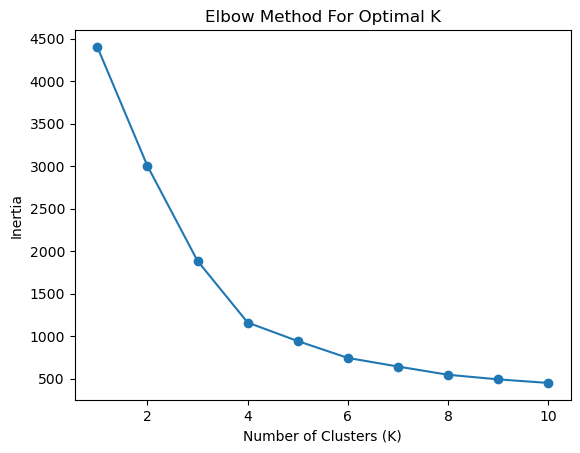

In [812]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [771]:
cluster_profiles = rfm_df.groupby('Cluster')[features].mean()

In [772]:
cluster_profiles

,Recency,Frequency,Monetary
Cluster,,,
0,1472.451087,12.786685,1670.704561
1,1648.789377,10.177656,1324.605222
2,1474.833333,269.500000,46043.284500
3,1474.450000,55.438889,8269.636289


#### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
 First define dependent variable with categories low value, medium value, high value using customer revenue
 
 Then perform Classification model

In [816]:
low_threshold = 100   
medium_threshold = 500  

In [839]:
dat_1=data.groupby('CustomerID')['revenue'].sum().reset_index()

In [840]:
dat_1

,CustomerID,revenue
0,12346,21.693
1,12347,9930.649
2,12348,1142.502
3,12350,952.049
4,12356,1009.729
...,...,...
1463,18259,474.075
1464,18260,1753.041
1465,18269,88.466
1466,18277,268.200


In [842]:
rfm_df=pd.merge(rfm_df,dat_1, on="CustomerID")

In [843]:
rfm_df

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Cluster,revenue
0,12346,2019-09-15,1502,1,21.693,Gold,Premium,Premium,GoldPremiumPremium,0,21.693
1,12347,2019-11-02,1454,31,9930.649,Gold,Standard,Standard,GoldStandardStandard,3,9930.649
2,12348,2019-10-19,1468,8,1142.502,Gold,Gold,Gold,GoldGoldGold,0,1142.502
3,12350,2019-12-14,1412,11,952.049,Premium,Gold,Gold,PremiumGoldGold,0,952.049
4,12356,2019-09-15,1502,13,1009.729,Gold,Silver,Gold,GoldSilverGold,0,1009.729
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,1665,3,474.075,Standard,Premium,Premium,StandardPremiumPremium,1,474.075
1464,18260,2019-10-05,1482,19,1753.041,Gold,Silver,Silver,GoldSilverSilver,0,1753.041
1465,18269,2019-06-20,1589,2,88.466,Silver,Premium,Premium,SilverPremiumPremium,1,88.466
1466,18277,2019-10-23,1464,1,268.200,Gold,Premium,Premium,GoldPremiumPremium,0,268.200


In [845]:
rfm_df['CLV_Category'] = pd.cut(data['revenue'], bins=[-float('inf'), low_threshold, medium_threshold, float('inf')],
                             labels=['Low Value', 'Medium Value', 'High Value'])

In [846]:
rfm_df

,CustomerID,Transaction_Date,Recency,Frequency,Monetary,R,F,M,RFM_Segment,Cluster,revenue,CLV_Category
0,12346,2019-09-15,1502,1,21.693,Gold,Premium,Premium,GoldPremiumPremium,0,21.693,Medium Value
1,12347,2019-11-02,1454,31,9930.649,Gold,Standard,Standard,GoldStandardStandard,3,9930.649,Medium Value
2,12348,2019-10-19,1468,8,1142.502,Gold,Gold,Gold,GoldGoldGold,0,1142.502,Medium Value
3,12350,2019-12-14,1412,11,952.049,Premium,Gold,Gold,PremiumGoldGold,0,952.049,Low Value
4,12356,2019-09-15,1502,13,1009.729,Gold,Silver,Gold,GoldSilverGold,0,1009.729,Medium Value
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,2019-04-05,1665,3,474.075,Standard,Premium,Premium,StandardPremiumPremium,1,474.075,Medium Value
1464,18260,2019-10-05,1482,19,1753.041,Gold,Silver,Silver,GoldSilverSilver,0,1753.041,Medium Value
1465,18269,2019-06-20,1589,2,88.466,Silver,Premium,Premium,SilverPremiumPremium,1,88.466,Medium Value
1466,18277,2019-10-23,1464,1,268.200,Gold,Premium,Premium,GoldPremiumPremium,0,268.200,Medium Value


In [847]:
features = ['Recency', 'Frequency', 'Monetary']

In [850]:
X = rfm_df[features]
y = rfm_df['CLV_Category']

In [851]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [852]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [853]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

  High Value       0.00      0.00      0.00         2
   Low Value       0.33      0.05      0.08        21
Medium Value       0.92      0.99      0.96       271

    accuracy                           0.91       294
   macro avg       0.42      0.35      0.35       294
weighted avg       0.88      0.91      0.89       294

Accuracy: 0.9149659863945578


In [866]:
new_recency = 1011
new_frequency=56
new_monetary=1055

In [867]:
new_data = pd.DataFrame({'Recency': [new_recency], 'Frequency': [new_frequency], 'Monetary': [new_monetary]})
prediction = model.predict(new_data)

In [868]:
prediction

array(['Medium Value'], dtype=object)

#### Cross-Selling (Which products are selling together)
 You can perform exploratory analysis & market basket analysis to understand which 
of items can be bundled together

In [870]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Month,Coupon_Code,Discount_pct,invoice_value,revenue,Week,Day,discount_val,gst_amount,CLV_Category
0,17850,M,Chicago,Jan,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339,Medium Value
1,17850,M,Chicago,Jan,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339,Medium Value
2,17850,M,Chicago,Jan,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,1,ELEC10,10,249.5846,220.986,1,Tuesday,24.554,22.0986,Medium Value
3,17850,M,Chicago,Jan,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,1,ELEC10,10,87.1850,73.350,1,Tuesday,8.150,7.3350,Low Value
4,17850,M,Chicago,Jan,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,1,ELEC10,10,158.6729,138.339,1,Tuesday,15.371,13.8339,Medium Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,15719,F,Chicago,Jul,33945,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,...,7,GC10,10,47.2500,45.000,30,Sunday,5.000,2.2500,Low Value
52520,17634,F,Chicago,Jul,33970,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250,Low Value
52521,17634,F,Chicago,Jul,33971,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250,Low Value
52522,17634,F,Chicago,Jul,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,...,7,GC10,10,23.6250,22.500,30,Sunday,2.500,1.1250,Low Value


In [878]:
basket = data.groupby(['Transaction_ID', 'Product_Description'])[["Quantity"]].agg(sum).unstack().reset_index().fillna(0).set_index("Transaction_ID")

In [890]:
min_support = 0.02
min_confidence = 0.5

In [891]:
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming min_support and min_confidence are predefined values
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [903]:
# Sort data by CustomerID and Transaction_Date
data.sort_values(['CustomerID', 'Transaction_Date'], inplace=True)

# Calculate days between consecutive transactions for each customer
data['Days_Between_Transactions'] = data.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Filter out the first transaction for each customer (NaN values in 'Days_Between_Transactions')
df_repeat_customers = data.dropna(subset=['Days_Between_Transactions'])

# Calculate average days per transaction for repeat customers
avg_days_per_transaction = df_repeat_customers.groupby('CustomerID')['Days_Between_Transactions'].mean()


In [905]:
# Create a new DataFrame with CustomerID and Avg Days per Transaction
df_avg_days = pd.DataFrame({'CustomerID': avg_days_per_transaction.index, 'Avg_Days_Per_Transaction': avg_days_per_transaction.values})

# Define bins for categorizing average days
bins = [0, 30, 60, 90, float('inf')]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']

# Create a new column for the dependent variable
df_avg_days['Next_Purchase_Category'] = pd.cut(df_avg_days['Avg_Days_Per_Transaction'], bins=bins, labels=labels, right=False)



In [906]:
df_avg_days

,CustomerID,Avg_Days_Per_Transaction,Next_Purchase_Category
0,12346,0.000000,0-30 days
1,12347,3.844828,0-30 days
2,12348,5.409091,0-30 days
3,12350,0.000000,0-30 days
4,12356,0.000000,0-30 days
...,...,...,...
1397,18256,0.000000,0-30 days
1398,18259,0.000000,0-30 days
1399,18260,2.763158,0-30 days
1400,18269,10.857143,0-30 days


In [ ]:
df_avg_days

In [907]:
df_avg_days["Next_Purchase_Category"].value_counts()

0-30 days     1385
30-60 days      11
90+ days         5
60-90 days       1
Name: Next_Purchase_Category, dtype: int64

#### Perform cohort analysis by defining below cohorts
 Customers who started in each month and understand their behaviour
 Which Month cohort has maximum retention?


In [938]:
data['CohortMonth'] = data['Transaction_Date'].dt.to_period('M')
data['CohortIndex'] = data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')


In [942]:
cohorts = data.groupby(['CohortIndex', 'CohortMonth']).agg({'CustomerID': 'nunique'}).reset_index()

cohort_pivot = cohorts.pivot_table(index='CohortIndex', columns='CohortMonth', values='CustomerID')
print(cohort_pivot)

CohortMonth  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  \
CohortIndex                                                                  
2019-01        215.0     13.0     24.0     34.0     23.0     44.0     35.0   
2019-02          NaN     96.0      7.0      9.0     16.0     17.0     22.0   
2019-03          NaN      NaN    177.0     18.0     35.0     25.0     32.0   
2019-04          NaN      NaN      NaN    163.0     14.0     24.0     24.0   
2019-05          NaN      NaN      NaN      NaN    112.0     12.0      9.0   
2019-06          NaN      NaN      NaN      NaN      NaN    137.0     20.0   
2019-07          NaN      NaN      NaN      NaN      NaN      NaN     93.0   
2019-08          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-09          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-10          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-11          NaN      NaN      NaN      NaN      NaN      Na

In [941]:
# Calculate retention rate for each cohort
retention_rate = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)

# Identify the cohort with maximum retention
max_retention_cohort = retention_rate.idxmax(axis=1)
print(f"Cohort with maximum retention: {max_retention_cohort.iloc[0]}")



Cohort with maximum retention: 2019-01
